In [10]:
with open(r"C:\Users\olive\Downloads\fraud detection.csv", "r") as f:
    for i in range(5):
        print(f.readline())
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

% # Credit Card Fraud Detection Dataset

%

% It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

%

% The original complete dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly imbalanced, the positive class (frauds) account for 0.172% of all transactionsThis dataset takes a 10% stratified sample.



In [11]:
from scipy.io import arff
import pandas as pd

data = arff.loadarff(r"C:\Users\olive\Downloads\fraud detection.csv")
df = pd.DataFrame(data[0])

df.head(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,123113.0,-4.168525,-4.164323,1.911850,1.130443,4.152041,-2.125948,-1.803619,0.675859,0.308972,...,-0.058678,-1.673241,0.937707,-0.616568,0.780497,-1.055841,-0.154194,0.146745,157.37,b'otherwise'
1,67116.0,-0.241374,-0.043836,1.545847,-0.950404,-0.819948,0.847419,-0.786322,-1.420254,1.645278,...,1.222000,-1.007936,-0.415337,-0.336823,1.033332,0.848539,0.117121,0.092623,96.35,b'otherwise'
2,125495.0,-2.134432,-2.219310,0.969065,-2.858480,0.693123,-1.315593,0.284006,0.149392,1.182680,...,0.579502,0.743960,0.519019,-0.354719,0.373946,-0.319379,-0.056289,0.155978,276.73,b'otherwise'
3,67705.0,-0.862259,-0.224703,2.308340,-1.941343,-0.321210,1.954794,-0.942382,0.729052,0.090916,...,0.121589,0.683341,-0.590164,-1.645139,0.665159,-0.005705,0.219394,0.098477,2.00,b'otherwise'
4,64782.0,1.241610,-0.051895,0.579918,-0.115431,-0.579488,-0.548451,-0.269573,-0.041116,0.353210,...,-0.103847,-0.237586,0.124342,0.143650,0.053582,0.933286,-0.052477,0.006476,1.54,b'otherwise'
5,31866.0,-0.655824,0.759808,2.144253,0.490666,0.103953,0.391045,0.159626,0.109992,0.174640,...,0.006465,0.210599,-0.292795,-0.423010,0.028267,-0.420763,0.045606,0.140026,9.99,b'otherwise'
6,43863.0,-0.471609,1.094895,1.552027,0.046605,0.243458,-0.954889,0.797913,-0.157293,-0.718485,...,-0.182622,-0.556609,-0.061509,0.355285,-0.273492,0.048562,0.074488,0.130511,2.28,b'otherwise'
7,95170.0,-1.998268,0.446070,0.794723,-2.760237,0.580827,1.938814,-0.447323,0.238026,1.109515,...,0.362968,1.362186,-0.240695,-0.967124,-0.151651,-0.244539,-1.292844,-0.267831,23.50,b'otherwise'
8,63095.0,0.970482,-0.847493,0.595211,0.567191,-0.826490,0.599934,-0.596635,0.183025,-0.931399,...,-0.232898,-0.343392,-0.126469,-0.317010,0.353549,-0.319808,0.060416,0.042538,145.42,b'otherwise'
9,82435.0,0.851779,-0.521319,1.080915,1.272890,-0.733079,1.000920,-0.782824,0.543702,0.642142,...,0.273540,0.716570,-0.108128,-0.302885,0.247468,-0.205952,0.070500,0.032549,100.50,b'otherwise'


In [12]:
df["class"] = df["class"].apply(lambda x: x.decode("utf-8"))

In [13]:
df["class"].unique()

array(['otherwise', 'fraud'], dtype=object)

In [14]:
df["class"].value_counts()

class
otherwise    28431
fraud           49
Name: count, dtype: int64

In [15]:
df["class"].value_counts(normalize=True)

class
otherwise    0.998279
fraud        0.001721
Name: proportion, dtype: float64

In [16]:
df["class"] = df["class"].map({"otherwise": 0,"fraud": 1})

<function matplotlib.pyplot.show(close=None, block=None)>

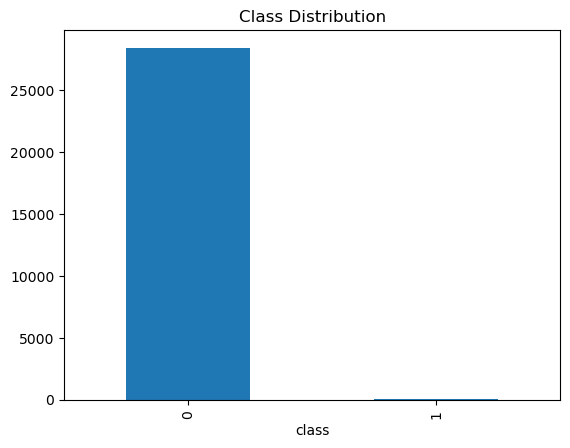

In [17]:
import matplotlib.pyplot as plt
df["class"].value_counts().plot(kind="bar")
plt.title("Class Distribution")
plt.show

In [18]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, average_precision_score)

In [19]:
from sklearn.model_selection import train_test_split 

x = df.drop(columns=["class"])
y = df["class"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

log_model = Pipeline([("scaler", StandardScaler()),("model", LogisticRegression(max_iter=1000))])

log_model.fit(x_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42,eval_metric="logloss")

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [24]:
def evaluate(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]

    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1:", f1_score(y_test, y_pred))
    print("PR AUC:", average_precision_score(y_test, y_proba))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Fraud cases in test:", sum(y_test == 1))
    print("-" * 30)

In [25]:
evaluate(log_model, x_test, y_test)
evaluate(rf_model, x_test, y_test)
evaluate(xgb_model, x_test, y_test)

Precision: 0.8
Recall: 0.4
F1: 0.5333333333333333
PR AUC: 0.8813455988455988
Confusion Matrix:
[[5685    1]
 [   6    4]]
Fraud cases in test: 10
------------------------------
Precision: 0.8571428571428571
Recall: 0.6
F1: 0.7058823529411765
PR AUC: 0.9119555444555445
Confusion Matrix:
[[5685    1]
 [   4    6]]
Fraud cases in test: 10
------------------------------
Precision: 0.9
Recall: 0.9
F1: 0.9
PR AUC: 0.9697979797979798
Confusion Matrix:
[[5685    1]
 [   1    9]]
Fraud cases in test: 10
------------------------------


In [26]:
from sklearn.model_selection import cross_val_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'XGBoost': XGBClassifier(n_estimators=100)
}

for name, model in models.items():
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='f1')
    print(f'{name}: Mean F1 = {scores.mean():.3f}')

C:\Users\olive\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\olive\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression: Mean F1 = 0.651
Random Forest: Mean F1 = 0.755
XGBoost: Mean F1 = 0.711


In [33]:
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    })

comparison_df = pd.DataFrame(results)
print(comparison_df)

C:\Users\olive\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


                 Model  Accuracy  Precision  Recall        F1
0  Logistic Regression  0.010885   0.001772     1.0  0.003537
1        Random Forest  0.999824   0.909091     1.0  0.952381
2              XGBoost  0.999824   0.909091     1.0  0.952381


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, average_precision_score, roc_auc_score, precision_recall_curve)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

In [34]:
## Scale the data (critical for Logistic Regression)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled  = scaler.transform(x_test)  # NEVER fit on test!

#  Balance using SMOTE + Undersampling
over  = SMOTE(sampling_strategy=0.1, random_state=42)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
imb_pipeline = ImbPipeline([('over', over), ('under', under)])

x_res, y_res = imb_pipeline.fit_resample(x_train_scaled, y_train)

# Check distribution
print("Before balancing:")
print(pd.Series(y_train).value_counts())
print("\nAfter balancing:")
print(pd.Series(y_res).value_counts())

Before balancing:
class
0    22745
1       39
Name: count, dtype: int64

After balancing:
class
0    4548
1    2274
Name: count, dtype: int64


In [35]:
# Imbalance ratio for XGBoost
scale = np.sum(y_train == 0) / np.sum(y_train == 1)
print(f"Imbalance ratio: {scale:.1f}:1")

models = {'Logistic Regression': LogisticRegression(class_weight='balanced',
        max_iter=5000,          # high enough to converge
        solver='saga',          # best for large imbalanced data
        C=0.1,                  # stronger regularization
        random_state=42
    ),

    'Random Forest': RandomForestClassifier(
        class_weight='balanced',
        n_estimators=300,
        max_depth=10,
        min_samples_leaf=4,
        random_state=42,
        n_jobs=-1
    ),

    'XGBoost': XGBClassifier(
        scale_pos_weight=scale,
        n_estimators=300,
        max_depth=6,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        min_child_weight=10,
        gamma=5,
        eval_metric='aucpr',
        random_state=42,
        n_jobs=-1
    )
}


Imbalance ratio: 583.2:1


In [36]:
trained_models = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_res, y_res)
    trained_models[name] = model
    print(f"  {name} done ✓")

lr_model  = trained_models['Logistic Regression']
rf_model  = trained_models['Random Forest']
xgb_model = trained_models['XGBoost']

print("\nAll models trained!")

Training Logistic Regression...
  Logistic Regression done ✓
Training Random Forest...
  Random Forest done ✓
Training XGBoost...
  XGBoost done ✓

All models trained!


In [32]:
from sklearn.metrics import classification_report, roc_auc_score

all_probas   = {}
best_threshs = {}
results      = []

thresholds_override = {
    'Logistic Regression': 0.05,
    'Random Forest'      : 0.5,
    'XGBoost'            : 0.8
}

print("=" * 55)
print("  Threshold Tuning Results (optimizing F1)")
print("=" * 55)

for name, model in trained_models.items():
    # Get probabilities
    y_proba          = model.predict_proba(x_test_scaled)[:, 1]
    all_probas[name] = y_proba

    # Use manual override threshold
    thresh             = thresholds_override[name]
    best_threshs[name] = thresh

    # Predict using that threshold
    y_pred = (y_proba >= thresh).astype(int)

    # Calculate metrics directly from y_pred
    from sklearn.metrics import precision_score, recall_score, f1_score
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec  = recall_score(y_test, y_pred, zero_division=0)
    f1   = f1_score(y_test, y_pred, zero_division=0)
    auc  = roc_auc_score(y_test, y_proba)

    print(f"\n{name} (Threshold = {thresh})")
    print("=" * 55)
    print(classification_report(y_test, y_pred,
          target_names=['Legit', 'Fraud'],
          zero_division=0))

    results.append({
        'Model'    : name,
        'Threshold': round(thresh, 3),
        'Precision': round(prec, 3),
        'Recall'   : round(rec, 3),
        'F1'       : round(f1, 3),
        'ROC-AUC'  : round(auc, 4)
    })

final_df = pd.DataFrame(results)
print("\n--- Final Comparison ---")
print(final_df.to_string(index=False))

  Threshold Tuning Results (optimizing F1)

Logistic Regression (Threshold = 0.05)
              precision    recall  f1-score   support

       Legit       1.00      0.86      0.92      5686
       Fraud       0.01      1.00      0.02        10

    accuracy                           0.86      5696
   macro avg       0.51      0.93      0.47      5696
weighted avg       1.00      0.86      0.92      5696


Random Forest (Threshold = 0.5)
              precision    recall  f1-score   support

       Legit       1.00      1.00      1.00      5686
       Fraud       0.67      1.00      0.80        10

    accuracy                           1.00      5696
   macro avg       0.83      1.00      0.90      5696
weighted avg       1.00      1.00      1.00      5696


XGBoost (Threshold = 0.8)
              precision    recall  f1-score   support

       Legit       1.00      0.99      1.00      5686
       Fraud       0.26      1.00      0.41        10

    accuracy                           